<a href="https://colab.research.google.com/github/yonjoos/Python/blob/main/Real_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import glob
import os
import pandas as pd
import numpy as np
import time
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from math import radians, cos, sin, asin, sqrt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import folium
from IPython.display import display



print("...beginning loading data...")
curr_file_list = os.listdir('/content/drive/MyDrive/Prj/pattern_create/RNN/GET_DATA/preprocessing/txt/ASW')
#glob.glob(os.path.join('../GET_DATA/preprocessing/txt/ASW', '*txt'))
curr_file_list=sorted(curr_file_list)
print(curr_file_list)
DataList=[]
c=0
for filename in curr_file_list:
  with open('/content/drive/MyDrive/Prj/pattern_create/RNN/GET_DATA/preprocessing/txt/ASW/'+filename) as file:
    data = pd.read_csv(file, sep='\t', header=None, names=['dateGMT', 'timeGMT', 'unixTime', 'lat', 'lon'])
    data["timeGMT"] = data["timeGMT"].str.replace(pat=r'\|000|\|00', repl=r'', regex=True)
    data["timeGMT"] = data["timeGMT"].str.replace(pat=r':', repl=r'', regex=True)
    data["dateGMT"] = data["dateGMT"].str.replace(pat=r'|', repl='', regex=True)
    data["unixTime"] = data["unixTime"].str.replace(pat=r'\|000|\|00', repl=r'', regex=True)
#         data["dateTimeGMT"] = pd.to_datetime(data["dateGMT"]+data["timeGMT"], format='%Y%m%d%H%M%S')
    data.drop(['dateGMT', 'timeGMT','unixTime'], axis=1, inplace=True)
    DataList.append([c,data])
    c+=1



...beginning loading data...
['20190816_ASW.txt', '20190820_ASW.txt', '20190826_ASW.txt', '20190830_ASW.txt', '20190901_ASW.txt', '20191120_ASW.txt', '20191229_ASW.txt', '20191231_ASW.txt', '20200101_ASW.txt', '20200104_ASW.txt', '20200107_ASW.txt', '20200113_ASW.txt', '20200114_ASW.txt', '20200116_ASW.txt', '20200120_ASW.txt', '20200121_ASW.txt', '20200124_ASW.txt', '20200130_ASW.txt']


In [3]:
#후버사인 : A(lon1, lat2), B(lon2, lat2) 사이 거리 구하는 함수
# Input : A, B의 위도, 경도
# output : A, B 사이의 거리 / 단위 : km

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [4]:
# df[index] 랑 df[index + 1] 사이의 거리 궇는 함수
# input : 위치 데이터, 계산 하고자하는 위치 데이터의 index
# output : index번째 위치라아 index + 1 번째 위치 사이의 거리

def make_continue_route(df,index):

    lat,lon=df.iloc[index] # df중 index 행
    n_lat,n_lon=df.iloc[index+1] # 그 다음 행
    d=haversine(lat,lon,n_lat,n_lon) #input지점과 바로 그 다음 지점 사이의 거리 out

    return d

In [5]:
def avd(d): # 평균 구하는 함수
    return np.mean(d)

#**run predict 함수**
###**함수 형태** : run_predict(예측할 데이터, training 할 window size)
> **input** : 예측할데이터(data), 윈도우크기(w)      
> **output** : 평균값 of 예측값과 실제 값의 차이         

###**함수 내부 변수** :
> **data_sc_df** : data 에서 Scaled data 뽑아서 담는 변수          
> **k** : w - 1 (w = window size)     
> **X_data** : 이유는 모르겠지만...





In [6]:
dataFront = DataList[1][1].iloc[0:196]
dataBack = DataList[1][1].iloc[196:1028]

indexes = []
for i in range (196, 263):
  indexes.append(i)

dataBack = dataBack.loc[::-1].reset_index(drop=True)
dataBack_lat = list(dataBack['lat'])
dataBack_lon = list(dataBack['lon'])
#dataBack = pd.DataFrame({'lat':dataBack['lat'], 'lon':dataBack['lon']}, index = indexes)
print(type(dataBack))

DataBack = pd.DataFrame({'lat':dataBack_lat, 'lon':dataBack_lon}, index = indexes)



print(dataFront)
print(dataBack)
print(DataBack)






<class 'pandas.core.frame.DataFrame'>
           lat         lon
0    37.537877  126.941077
1    37.537935  126.941022
2    37.537998  126.940972
3    37.538082  126.940927
4    37.538132  126.940860
..         ...         ...
191  37.544240  126.925603
192  37.544315  126.925568
193  37.544387  126.925588
194  37.544457  126.925627
195  37.544530  126.925655

[196 rows x 2 columns]
          lat         lon
0   37.547615  126.922778
1   37.547568  126.922848
2   37.547523  126.922920
3   37.547442  126.922945
4   37.547368  126.922940
..        ...         ...
62  37.544798  126.924650
63  37.544787  126.924770
64  37.544812  126.924858
65  37.544767  126.924933
66  37.544688  126.924857

[67 rows x 2 columns]
           lat         lon
196  37.547615  126.922778
197  37.547568  126.922848
198  37.547523  126.922920
199  37.547442  126.922945
200  37.547368  126.922940
..         ...         ...
258  37.544798  126.924650
259  37.544787  126.924770
260  37.544812  126.924858
261  37.5

In [10]:
def run_optimization(data,w):
    '''
    하이퍼 파라미터 최적화 실행함수
    input: train, validation ,w(window_size): 목적함수
    output: harversine으로 계산한 예측 값과 실제 값의 차이(error)의 평균 값
    '''
    data_sc_df=data
    w=w
    for s in range(1, w):
        data_sc_df['shift_{}_lat'.format(s)],data_sc_df['shift_{}_lon'.format(s)] = data_sc_df['Scaled_lat'].shift(s),data_sc_df['Scaled_lon'].shift(s)

    k=w-1
    X_data = data_sc_df.dropna().drop(['shift_{}_lat'.format(k),'shift_{}_lon'.format(k)], axis=1)
    y_data = data_sc_df.dropna()[['shift_{}_lat'.format(k),'shift_{}_lon'.format(k)]]

    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2,shuffle=False, random_state=0)

    X_train=X_train.values
    X_test=X_test.values
    y_train=y_train.values
    y_test=y_test.values

    X_train_t = X_train.reshape(X_train.shape[0], k, 2)
    X_test_t=X_test.reshape(X_test.shape[0],k,2)

    K.clear_session()
    model = Sequential() # Sequeatial Model
    model.add(LSTM(300, input_shape=(k, 2))) # (timestep, feature)
    model.add(Dense(2)) # output = 1
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

    p=5 #int(input('patience : '))
    early_stop = EarlyStopping(monitor='val_loss',mode='auto',patience=p, verbose=1)

    result=model.fit(X_train_t, y_train, epochs=200,validation_data=(X_test_t,y_test),
              batch_size=32, verbose=1, shuffle=False, callbacks=[early_stop])

    y_pred = model.predict(X_test_t)
    y_pred = sc.inverse_transform(y_pred)
    y_pred_df = pd.DataFrame(y_pred, columns=['prediction_lat','prediction_lon'])
    Y_validation=sc.inverse_transform(y_test)
    inx =[]
    for m in range(y_test.shape[0]):
      inx.append(m)
    df_ = pd.DataFrame({'위도':Y_validation[:,0], '경도':Y_validation[:,1]}, index = inx)
    d=[]
    for i in range(df_.shape[0]):
         d.append(haversine(df_.iloc[i][0],df_.iloc[i][1],y_pred[i][0],y_pred[i][1]))

    return avd(d)

In [35]:
def run_predict(front, back, wf, wb):
  datalist=front

  sc = MinMaxScaler()
  sc_data=sc.fit_transform(datalist)
  sc_df = pd.DataFrame(sc_data, columns=['Scaled_lat','Scaled_lon'], index=datalist.index)


  w=wf
  start = time.time() #작동시간 체크 시작


  ############################################################################
  ############################################################################
  data_sc_df=sc_df

  for s in range(1, w):
    data_sc_df['shift_{}_lat'.format(s)],data_sc_df['shift_{}_lon'.format(s)] = data_sc_df['Scaled_lat'].shift(s),data_sc_df['Scaled_lon'].shift(s)

  k=w-1
  X_data = data_sc_df.dropna().drop(['shift_{}_lat'.format(k),'shift_{}_lon'.format(k)], axis=1)
  y_data = data_sc_df.dropna()[['shift_{}_lat'.format(k),'shift_{}_lon'.format(k)]]

  X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2,shuffle=False,random_state=0)

  length = y_test.shape[0]

  X_train=X_train.values
  X_test=X_test.values
  y_train=y_train.values
  y_test=y_test.values

  X_train_t = X_train.reshape(X_train.shape[0], k, 2)
  X_test_t=X_test.reshape(X_test.shape[0],k,2)

  K.clear_session()
  model = Sequential() # Sequeatial Model
  model.add(LSTM(300, input_shape=(k, 2))) # (timestep, feature)
  model.add(Dense(2)) # output = 1
  model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

  p=5 #int(input('patience : '))
  early_stop = EarlyStopping(monitor='val_loss',mode='auto',patience=p, verbose=1)

  result=model.fit(X_train_t, y_train, epochs=200,validation_data=(X_test_t,y_test), batch_size=32, verbose=1, shuffle=False, callbacks=[early_stop])

  y_pred = model.predict(X_test_t)
  y_pred = sc.inverse_transform(y_pred)
  y_pred_df = pd.DataFrame(y_pred, columns=['prediction_lat','prediction_lon'])
  Y_validation=sc.inverse_transform(y_test)

  loss_and_metrics = model.evaluate(X_test_t, y_test)
  df_ = pd.DataFrame({'lat':Y_validation[:,0], 'lon':Y_validation[:,1]},index=[i for i in range(length)])
  d=[]
  for i in range(df_.shape[0]):
    d.append(haversine(df_.iloc[i][0],df_.iloc[i][1],y_pred[i][0],y_pred[i][1]))

  ADE = avd(d)
  FDE = d[-1]
  r = result
  df=df_
  pred_df=y_pred_df
  lo=loss_and_metrics


  ############################################################################
  ############################################################################

  # ADE,FDE,r,df,pred_df,lo=run_predict(sc_df,w) 얘를 위에걸로 대치


        # summarize history for loss
  plt.plot(r.history['loss'])
  plt.plot(r.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  print('FDE : {}, ADE : {}'.format(FDE,ADE))
  #print('data num: {}' .format(len(datalist.index)))

  ASW_map = folium.Map(location=[datalist['lat'].mean(),datalist['lon'].mean()],tiles='Stamen Toner',zoom_start=13)
  d=[]

  for i in range(datalist.shape[0]-(w-1)):
    folium.Circle([datalist['lat'][i],datalist['lon'][i]],radius=1,color='green').add_to(ASW_map)#, popup=df_cities.index[i]
  for i in range(pred_df.shape[0]):
    folium.Circle([pred_df['prediction_lat'][i],pred_df['prediction_lon'][i]],radius=1,color='red').add_to(ASW_map)#,popup='predicted location',icon=folium.Icon(color='red',icon_color='blue'
    folium.Circle([df['lat'][i],df['lon'][i]],radius=1,color='orange').add_to(ASW_map)
    d.append(haversine(pred_df['prediction_lat'][i],pred_df['prediction_lon'][i],df['lat'][i],df['lon'][i]))


  #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
  #@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
  datalist2=back

  sc = MinMaxScaler()
  sc_data=sc.fit_transform(datalist2)
  sc_df = pd.DataFrame(sc_data, columns=['Scaled_lat','Scaled_lon'], index=datalist2.index)


  w=wb


  ############################################################################
  ############################################################################
  data_sc_df=sc_df

  for s in range(1, w):
    data_sc_df['shift_{}_lat'.format(s)],data_sc_df['shift_{}_lon'.format(s)] = data_sc_df['Scaled_lat'].shift(s),data_sc_df['Scaled_lon'].shift(s)

  k=w-1
  X_data = data_sc_df.dropna().drop(['shift_{}_lat'.format(k),'shift_{}_lon'.format(k)], axis=1)
  y_data = data_sc_df.dropna()[['shift_{}_lat'.format(k),'shift_{}_lon'.format(k)]]

  X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2,shuffle=False,random_state=0)

  length = y_test.shape[0]

  X_train=X_train.values
  X_test=X_test.values
  y_train=y_train.values
  y_test=y_test.values

  X_train_t = X_train.reshape(X_train.shape[0], k, 2)
  X_test_t=X_test.reshape(X_test.shape[0],k,2)

  K.clear_session()
  model = Sequential() # Sequeatial Model
  model.add(LSTM(300, input_shape=(k, 2))) # (timestep, feature)
  model.add(Dense(2)) # output = 1
  model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])

  p=5 #int(input('patience : '))
  early_stop = EarlyStopping(monitor='val_loss',mode='auto',patience=p, verbose=1)

  result2=model.fit(X_train_t, y_train, epochs=200,validation_data=(X_test_t,y_test), batch_size=32, verbose=1, shuffle=False, callbacks=[early_stop])

  y_pred = model.predict(X_test_t)
  y_pred = sc.inverse_transform(y_pred)
  y_pred_df = pd.DataFrame(y_pred, columns=['prediction_lat','prediction_lon'])
  Y_validation=sc.inverse_transform(y_test)

  loss_and_metrics = model.evaluate(X_test_t, y_test)
  df_ = pd.DataFrame({'lat':Y_validation[:,0], 'lon':Y_validation[:,1]},index=[i for i in range(length)])
  d2=[]
  for i in range(df_.shape[0]):
    d2.append(haversine(df_.iloc[i][0],df_.iloc[i][1],y_pred[i][0],y_pred[i][1]))

  ADE2 = avd(d2)
  FDE2 = d2[-1]
  r2 = result
  df2=df_
  pred_df2=y_pred_df
  lo2=loss_and_metrics


  ############################################################################
  ############################################################################

  # ADE,FDE,r,df,pred_df,lo=run_predict(sc_df,w) 얘를 위에걸로 대치



  end = time.time() #작동시간 체크 끝
  training_time=end-start
        # summarize history for loss
  plt.plot(r2.history['loss'])
  plt.plot(r2.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  print('FDE : {}, ADE : {}'.format(FDE2,ADE2))
  print('training time: {}' .format(training_time))
  #print('data num: {}' .format(len(datalist.index)))

  return avd(d),d[-1],result,df,pred_df,lo, avd(d2),d2[-1],result2,df2,pred_df2,lo2


Epoch 1/200
5/5 [==============================] - 3s 159ms/step - loss: 0.3495 - accuracy: 0.6452 - val_loss: 0.3796 - val_accuracy: 1.0000
Epoch 2/200
5/5 [==============================] - 0s 19ms/step - loss: 0.2969 - accuracy: 0.6194 - val_loss: 0.3431 - val_accuracy: 0.6923
Epoch 3/200
5/5 [==============================] - 0s 23ms/step - loss: 0.2495 - accuracy: 0.6194 - val_loss: 0.3079 - val_accuracy: 0.4872
Epoch 4/200
5/5 [==============================] - 0s 19ms/step - loss: 0.2054 - accuracy: 0.6194 - val_loss: 0.2747 - val_accuracy: 0.3846
Epoch 5/200
5/5 [==============================] - 0s 22ms/step - loss: 0.1646 - accuracy: 0.6194 - val_loss: 0.2443 - val_accuracy: 0.3333
Epoch 6/200
5/5 [==============================] - 0s 19ms/step - loss: 0.1278 - accuracy: 0.6194 - val_loss: 0.2178 - val_accuracy: 0.3333
Epoch 7/200
5/5 [==============================] - 0s 21ms/step - loss: 0.0964 - accuracy: 0.6194 - val_loss: 0.1963 - val_accuracy: 0.3590
Epoch 8/200
5/5 [==

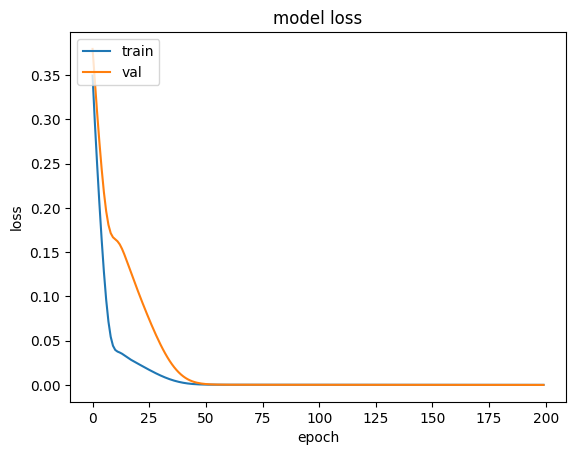

FDE : 0.04450627997409511, ADE : 0.025899843103264486
Epoch 1/200
2/2 [==============================] - 3s 581ms/step - loss: 0.1722 - accuracy: 0.1961 - val_loss: 0.2828 - val_accuracy: 0.0000e+00
Epoch 2/200
2/2 [==============================] - 0s 67ms/step - loss: 0.1341 - accuracy: 0.8235 - val_loss: 0.2559 - val_accuracy: 0.0000e+00
Epoch 3/200
2/2 [==============================] - 0s 68ms/step - loss: 0.1029 - accuracy: 0.8235 - val_loss: 0.2301 - val_accuracy: 0.0000e+00
Epoch 4/200
2/2 [==============================] - 0s 49ms/step - loss: 0.0756 - accuracy: 0.8235 - val_loss: 0.2068 - val_accuracy: 0.0000e+00
Epoch 5/200
2/2 [==============================] - 0s 57ms/step - loss: 0.0524 - accuracy: 0.8235 - val_loss: 0.1867 - val_accuracy: 0.0000e+00
Epoch 6/200
2/2 [==============================] - 0s 51ms/step - loss: 0.0337 - accuracy: 0.8235 - val_loss: 0.1710 - val_accuracy: 0.0000e+00
Epoch 7/200
2/2 [==============================] - 0s 53ms/step - loss: 0.0208 - 

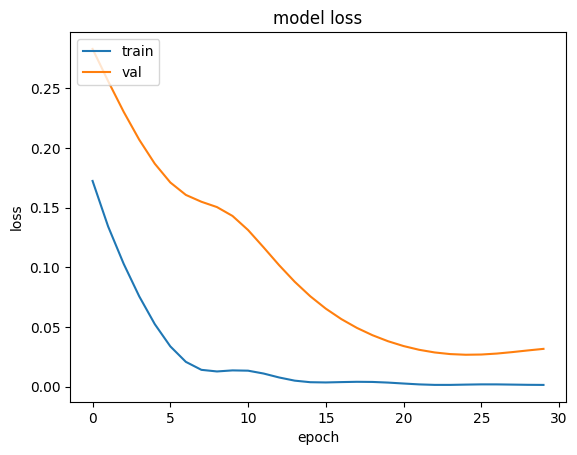

FDE : 0.09028728162378145, ADE : 0.058354294857777336
training time: 52.69263935089111


In [31]:
run_predict(dataFront, dataBack, 2, 4)

Dataset: 1
Data Type ENTER (C or N): C
[195, 239]
<class 'pandas.core.frame.DataFrame'>
Epoch 1/200
5/5 [==============================] - 4s 221ms/step - loss: 0.3457 - accuracy: 0.4129 - val_loss: 0.3850 - val_accuracy: 0.0000e+00
Epoch 2/200
5/5 [==============================] - 0s 22ms/step - loss: 0.2927 - accuracy: 0.6194 - val_loss: 0.3475 - val_accuracy: 0.0000e+00
Epoch 3/200
5/5 [==============================] - 0s 19ms/step - loss: 0.2452 - accuracy: 0.6194 - val_loss: 0.3116 - val_accuracy: 0.0000e+00
Epoch 4/200
5/5 [==============================] - 0s 20ms/step - loss: 0.2010 - accuracy: 0.6194 - val_loss: 0.2781 - val_accuracy: 0.0000e+00
Epoch 5/200
5/5 [==============================] - 0s 23ms/step - loss: 0.1604 - accuracy: 0.6194 - val_loss: 0.2480 - val_accuracy: 0.0000e+00
Epoch 6/200
5/5 [==============================] - 0s 20ms/step - loss: 0.1242 - accuracy: 0.6194 - val_loss: 0.2225 - val_accuracy: 0.0000e+00
Epoch 7/200
5/5 [==============================

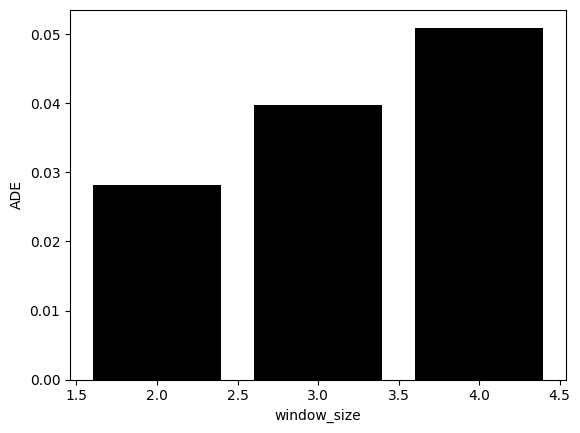

Epoch 1/200
2/2 [==============================] - 3s 542ms/step - loss: 0.1697 - accuracy: 0.8077 - val_loss: 0.2987 - val_accuracy: 0.0000e+00
Epoch 2/200
2/2 [==============================] - 0s 42ms/step - loss: 0.1590 - accuracy: 0.8077 - val_loss: 0.2900 - val_accuracy: 0.0000e+00
Epoch 3/200
2/2 [==============================] - 0s 44ms/step - loss: 0.1494 - accuracy: 0.8077 - val_loss: 0.2812 - val_accuracy: 0.0000e+00
Epoch 4/200
2/2 [==============================] - 0s 44ms/step - loss: 0.1402 - accuracy: 0.8077 - val_loss: 0.2725 - val_accuracy: 0.0000e+00
Epoch 5/200
2/2 [==============================] - 0s 41ms/step - loss: 0.1313 - accuracy: 0.8077 - val_loss: 0.2640 - val_accuracy: 0.0000e+00
Epoch 6/200
2/2 [==============================] - 0s 65ms/step - loss: 0.1228 - accuracy: 0.8077 - val_loss: 0.2556 - val_accuracy: 0.0000e+00
Epoch 7/200
2/2 [==============================] - 0s 46ms/step - loss: 0.1146 - accuracy: 0.8077 - val_loss: 0.2474 - val_accuracy: 0.

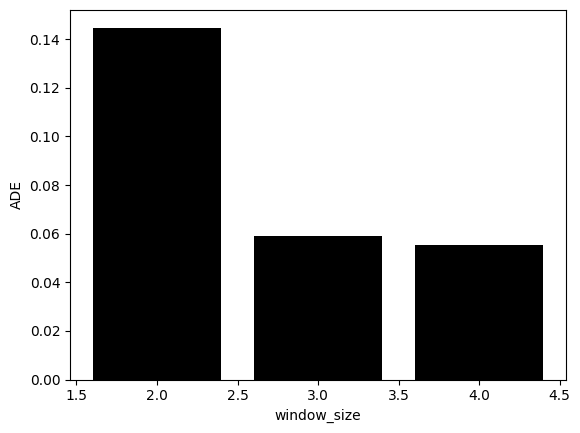

Epoch 1/200
5/5 [==============================] - 3s 162ms/step - loss: 0.3555 - accuracy: 0.6774 - val_loss: 0.3747 - val_accuracy: 1.0000
Epoch 2/200
5/5 [==============================] - 0s 20ms/step - loss: 0.3043 - accuracy: 0.7032 - val_loss: 0.3397 - val_accuracy: 1.0000
Epoch 3/200
5/5 [==============================] - 0s 21ms/step - loss: 0.2579 - accuracy: 0.6258 - val_loss: 0.3055 - val_accuracy: 1.0000
Epoch 4/200
5/5 [==============================] - 0s 21ms/step - loss: 0.2144 - accuracy: 0.6194 - val_loss: 0.2729 - val_accuracy: 0.8974
Epoch 5/200
5/5 [==============================] - 0s 20ms/step - loss: 0.1735 - accuracy: 0.6194 - val_loss: 0.2425 - val_accuracy: 0.7949
Epoch 6/200
5/5 [==============================] - 0s 19ms/step - loss: 0.1360 - accuracy: 0.6194 - val_loss: 0.2157 - val_accuracy: 0.7436
Epoch 7/200
5/5 [==============================] - 0s 21ms/step - loss: 0.1034 - accuracy: 0.6194 - val_loss: 0.1938 - val_accuracy: 0.7179
Epoch 8/200
5/5 [==

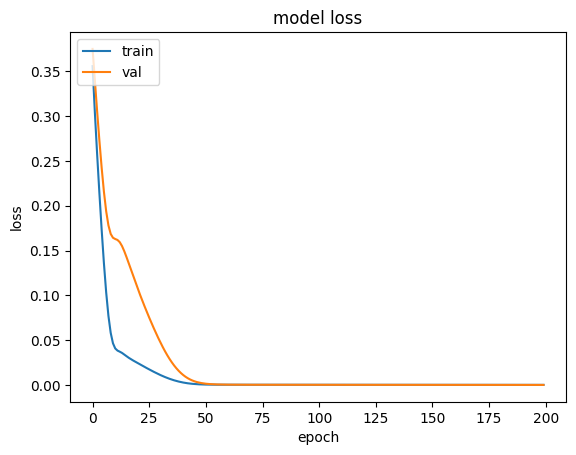

FDE : 0.045373024157318614, ADE : 0.026778630517919462
Epoch 1/200
2/2 [==============================] - 3s 587ms/step - loss: 0.1745 - accuracy: 0.8235 - val_loss: 0.2359 - val_accuracy: 0.0000e+00
Epoch 2/200
2/2 [==============================] - 0s 53ms/step - loss: 0.1332 - accuracy: 0.8235 - val_loss: 0.2081 - val_accuracy: 0.0000e+00
Epoch 3/200
2/2 [==============================] - 0s 52ms/step - loss: 0.0998 - accuracy: 0.8235 - val_loss: 0.1831 - val_accuracy: 0.0000e+00
Epoch 4/200
2/2 [==============================] - 0s 56ms/step - loss: 0.0715 - accuracy: 0.8235 - val_loss: 0.1622 - val_accuracy: 0.0000e+00
Epoch 5/200
2/2 [==============================] - 0s 52ms/step - loss: 0.0482 - accuracy: 0.8235 - val_loss: 0.1466 - val_accuracy: 0.0000e+00
Epoch 6/200
2/2 [==============================] - 0s 68ms/step - loss: 0.0307 - accuracy: 0.8235 - val_loss: 0.1379 - val_accuracy: 0.0000e+00
Epoch 7/200
2/2 [==============================] - 0s 69ms/step - loss: 0.0198 -

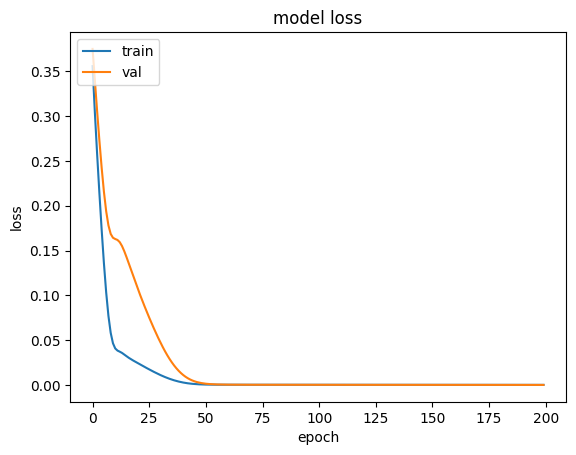

FDE : 0.08758362993118039, ADE : 0.056331554981363996
training time: 37.55453038215637


<class 'pandas.core.frame.DataFrame'>
Epoch 1/200
6/6 [==============================] - 4s 140ms/step - loss: 0.3188 - accuracy: 0.5474 - val_loss: 0.3240 - val_accuracy: 0.0000e+00
Epoch 2/200
6/6 [==============================] - 0s 19ms/step - loss: 0.2604 - accuracy: 0.6316 - val_loss: 0.2869 - val_accuracy: 0.0000e+00
Epoch 3/200
6/6 [==============================] - 0s 20ms/step - loss: 0.2095 - accuracy: 0.6316 - val_loss: 0.2525 - val_accuracy: 0.0000e+00
Epoch 4/200
6/6 [==============================] - 0s 22ms/step - loss: 0.1635 - accuracy: 0.6316 - val_loss: 0.2222 - val_accuracy: 0.0000e+00
Epoch 5/200
6/6 [==============================] - 0s 21ms/step - loss: 0.1231 - accuracy: 0.6316 - val_loss: 0.1977 - val_accuracy: 0.0000e+00
Epoch 6/200
6/6 [==============================] - 0s 22ms/step - loss: 0.0900 - accuracy: 0.6316 - val_loss: 0.1810 - val_accuracy: 0.0000e+00
Epoch 7/200
6/6 [==============================] - 0s 21ms/step - loss: 0.0661 - accuracy: 0.6316

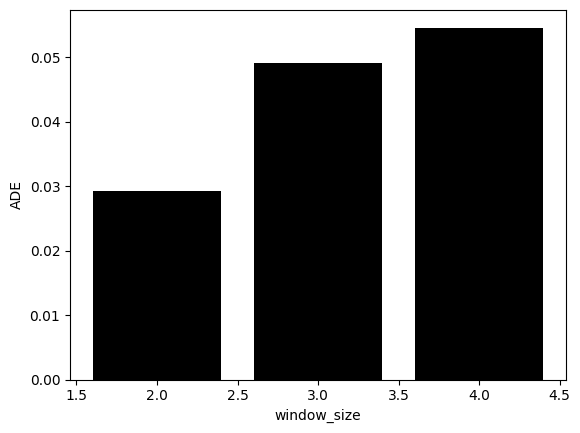

Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 0.6035 - accuracy: 0.8235 - val_loss: 0.1380 - val_accuracy: 1.0000
Epoch 2/200
1/1 [==============================] - 0s 55ms/step - loss: 0.5851 - accuracy: 0.8235 - val_loss: 0.1334 - val_accuracy: 1.0000
Epoch 3/200
1/1 [==============================] - 0s 71ms/step - loss: 0.5670 - accuracy: 0.8235 - val_loss: 0.1288 - val_accuracy: 1.0000
Epoch 4/200
1/1 [==============================] - 0s 50ms/step - loss: 0.5492 - accuracy: 0.8235 - val_loss: 0.1243 - val_accuracy: 1.0000
Epoch 5/200
1/1 [==============================] - 0s 69ms/step - loss: 0.5316 - accuracy: 0.8235 - val_loss: 0.1198 - val_accuracy: 1.0000
Epoch 6/200
1/1 [==============================] - 0s 51ms/step - loss: 0.5142 - accuracy: 0.8235 - val_loss: 0.1155 - val_accuracy: 1.0000
Epoch 7/200
1/1 [==============================] - 0s 57ms/step - loss: 0.4970 - accuracy: 0.8235 - val_loss: 0.1112 - val_accuracy: 1.0000
Epoch 8/200
1/1 [=====

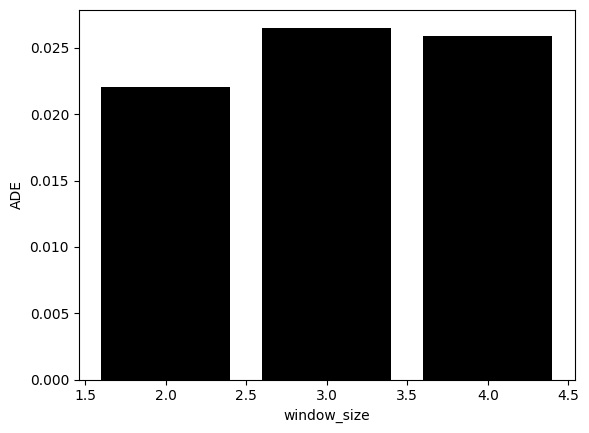

Epoch 1/200
6/6 [==============================] - 4s 191ms/step - loss: 0.3006 - accuracy: 0.4368 - val_loss: 0.3215 - val_accuracy: 0.0000e+00
Epoch 2/200
6/6 [==============================] - 0s 29ms/step - loss: 0.2433 - accuracy: 0.6316 - val_loss: 0.2838 - val_accuracy: 0.0000e+00
Epoch 3/200
6/6 [==============================] - 0s 27ms/step - loss: 0.1936 - accuracy: 0.6316 - val_loss: 0.2493 - val_accuracy: 0.0000e+00
Epoch 4/200
6/6 [==============================] - 0s 29ms/step - loss: 0.1494 - accuracy: 0.6316 - val_loss: 0.2195 - val_accuracy: 0.0000e+00
Epoch 5/200
6/6 [==============================] - 0s 25ms/step - loss: 0.1116 - accuracy: 0.6316 - val_loss: 0.1960 - val_accuracy: 0.0000e+00
Epoch 6/200
6/6 [==============================] - 0s 26ms/step - loss: 0.0816 - accuracy: 0.6316 - val_loss: 0.1804 - val_accuracy: 0.0000e+00
Epoch 7/200
6/6 [==============================] - 0s 30ms/step - loss: 0.0609 - accuracy: 0.6316 - val_loss: 0.1731 - val_accuracy: 0.

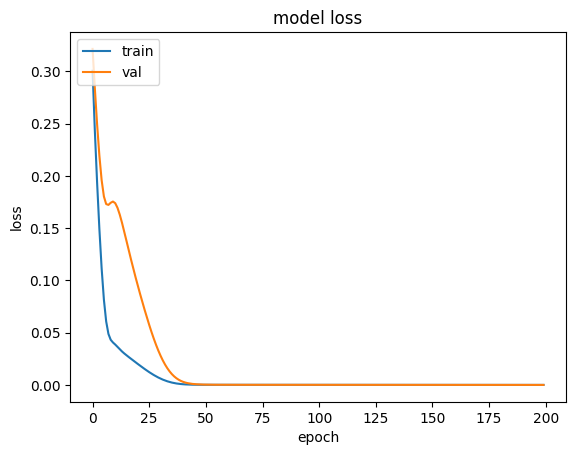

FDE : 0.024479749088161733, ADE : 0.026856834252594802
Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 0.6085 - accuracy: 0.8235 - val_loss: 0.1413 - val_accuracy: 1.0000
Epoch 2/200
1/1 [==============================] - 0s 56ms/step - loss: 0.5893 - accuracy: 0.8235 - val_loss: 0.1367 - val_accuracy: 1.0000
Epoch 3/200
1/1 [==============================] - 0s 70ms/step - loss: 0.5705 - accuracy: 0.8235 - val_loss: 0.1322 - val_accuracy: 1.0000
Epoch 4/200
1/1 [==============================] - 0s 57ms/step - loss: 0.5520 - accuracy: 0.8235 - val_loss: 0.1278 - val_accuracy: 1.0000
Epoch 5/200
1/1 [==============================] - 0s 50ms/step - loss: 0.5338 - accuracy: 0.8235 - val_loss: 0.1235 - val_accuracy: 1.0000
Epoch 6/200
1/1 [==============================] - 0s 55ms/step - loss: 0.5158 - accuracy: 0.8235 - val_loss: 0.1192 - val_accuracy: 1.0000
Epoch 7/200
1/1 [==============================] - 0s 61ms/step - loss: 0.4980 - accuracy: 0.8235 - val_los

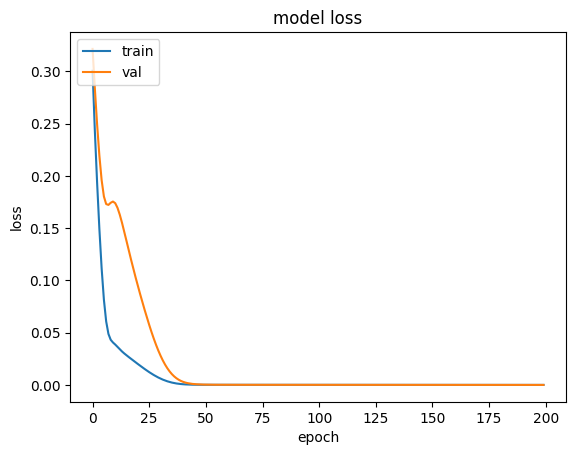

FDE : 0.02070693101403355, ADE : 0.024497724293529786
training time: 40.26602578163147


TypeError: ignored

In [38]:
while True:
  Dat=int(input('Dataset: '))
  Type=input('Data Type ENTER (C or N): ')

  Data = DataList[Dat][1]
  len = DataList[Dat][1].shape[0]

  DataPoint = []

  for j in range(0, len-1):
    if haversine(DataList[Dat][1].loc[j][0], DataList[Dat][1].loc[j][1], DataList[Dat][1].loc[j+1][0], DataList[Dat][1].loc[j+1][1]) > 0.05 :
      DataPoint.append(j)

  print(DataPoint)

  for i in DataPoint:
    dataFront = Data.iloc[0:i]
    dataBack = Data.iloc[i+1:]

    indexes = []
    for j in range (i+1, len):
      indexes.append(j)

    dataBack = dataBack.loc[::-1].reset_index(drop=True)
    dataBack_lat = list(dataBack['lat'])
    dataBack_lon = list(dataBack['lon'])
    #dataBack = pd.DataFrame({'lat':dataBack['lat'], 'lon':dataBack['lon']}, index = indexes)
    print(type(dataBack))

    dataBack = pd.DataFrame({'lat':dataBack_lat, 'lon':dataBack_lon}, index = indexes)


    sc = MinMaxScaler()
    sc_data=sc.fit_transform(dataFront)
    sc_df = pd.DataFrame(sc_data, columns=['Scaled_lat','Scaled_lon'], index=dataFront.index)


    result=[]
    for i in range(2,5): # grid search 이용하여 window 값 최적화
      result.append(run_optimization(sc_df,i))
      print(i)

    index=result.index(min(result))
    model_num=index+2 #최적화 된 window 값
    print('Data {}\'s Optimized Window Size : {} '.format(Data,model_num)) #최적화 된 error 값
    #print(result[model_num])
    plt.bar(range(2,5),result,color='black')
    plt.xlabel('window_size')
    plt.ylabel('ADE')
    plt.show()



    sc_data2=sc.fit_transform(dataBack)
    sc_df2 = pd.DataFrame(sc_data2, columns=['Scaled_lat','Scaled_lon'], index=dataBack.index)

    result2=[]
    for i in range(2,5): # grid search 이용하여 window 값 최적화
      result2.append(run_optimization(sc_df2,i))
      print(i)

    index=result2.index(min(result2))
    model_num2=index+2 #최적화 된 window 값
    print('Data {}\'s Optimized Window Size : {} '.format(Data,model_num2)) #최적화 된 error 값
    #print(result2[model_num2])
    plt.bar(range(2,5),result2,color='black')
    plt.xlabel('window_size')
    plt.ylabel('ADE')
    plt.show()


    ADE,FDE,r_f,df_f,pred_df_f,lo_f, ADE2,FDE2,r_b,df_b,pred_df_b,lo_b = run_predict(dataFront, dataBack, model_num, model_num2)

    ASW_map = folium.Map(location=[dataFront['lat'].mean(),dataFront['lon'].mean()],tiles='Stamen Toner',zoom_start=13)
    d=[]
    if haversine(pred_df_f['prediction_lat'][pred_df_f.shape[0]-1],pred_df_f['prediction_lon'][pred_df_f.shape[0]-1], pred_df_b['prediction_lat'][pred_df_b.shape[0]-1],pred_df_b['prediction_lon'][pred_df_b.shape[0]-1]) <= 0.05:
      for i in range(len(dataFront)-(w-1)):
          folium.Circle([dataFront['lat'][i],dataFront['lon'][i]],radius=1,color='blue').add_to(ASW_map)#, popup=df_cities.index[i]
      for i in range(len(pred_df_f)):
          folium.Circle([pred_df_f['prediction_lat'][i],pred_df_f['prediction_lon'][i]],radius=1,color='red').add_to(ASW_map)#,popup='predicted location',icon=folium.Icon(color='red',icon_color='blue'
          folium.Circle([df_f['lat'][i],df_f['lon'][i]],radius=1,color='orange').add_to(ASW_map)
          d.append(haversine(pred_df_f['prediction_lat'][i],pred_df_f['prediction_lon'][i],df_f['lat'][i],df_f['lon'][i]))

    display(ASW_map)

